In [10]:
from mk_filter import *
import soundfile as sf
from impulse import calc_RT
import csv
import struct

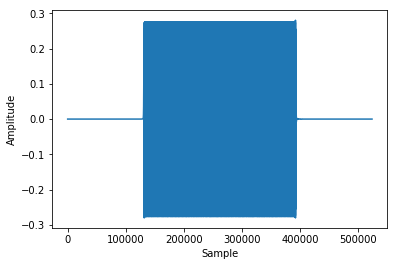

In [11]:
## API なし

##こちらを使用！！！！！！！！！！！！！！
import numpy as np
from scipy.fftpack import fft, ifft 
import soundfile as sf
import matplotlib.pyplot as plt
%matplotlib inline  

N = 2**19
J = N/2
k = np.arange(0,N/2+1,1)
up_ss = np.zeros(N+1, dtype = np.complex)
up_ss[:int(N/2+1)] = np.exp(-1j*2*np.pi*J*((k/N)**2)) # 0〜N/2 
up_ss_firsthalf = up_ss[:int(N/2)] # 0〜N/2-1 
up_ss[int(N/2+1):] = up_ss_firsthalf[::-1].conjugate() # N/2+1〜N
 
# 逆FFT
up_ss_ifft = ifft(up_ss, n=N)
 
# 実部取り出し
up_ss_ifft_real = np.real(up_ss_ifft)
 
# 円状シフト
shift_length = int((N-J)/2)
up_ss_ifft_real_roll = np.roll(up_ss_ifft_real, shift_length)
 
# 信号の可視化，再生
up_ss_signal = up_ss_ifft_real_roll * 100
 
t = np.linspace(0, N, N+1)

plt.plot(up_ss_signal)
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.show()
 
fs = 48000


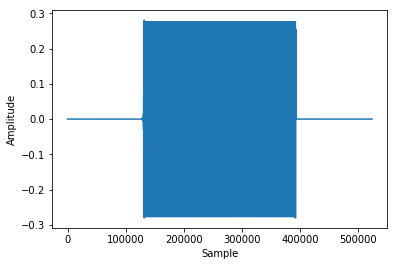

In [12]:
down_ss = np.zeros(N+1, dtype = np.complex)
down_ss[:int(N/2+1)] = np.exp(1j*2*np.pi*J*((k/N)**2))
down_ss_firsthalf = down_ss[:int(N/2)]
down_ss[int(N/2+1):] = down_ss_firsthalf[::-1].conjugate()

# 逆FFT
down_ss_ifft = ifft(down_ss, n=N)
 
# 実部取り出し
down_ss_ifft_real = np.real(down_ss_ifft)
 
# 円状シフト
shift_length = int(N-(N-J)/2)
down_ss_ifft_real_roll = np.roll(down_ss_ifft_real, shift_length)
 
# 信号の可視化，再生
down_ss_signal = down_ss_ifft_real_roll * 100
 
plt.plot(down_ss_signal)
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.show()


In [13]:
sf.write('./data/sweep.wav',up_ss_signal,fs)
with open('data/sweep.fb', "wb") as f:
    for data in up_ss_signal:
        data = struct.pack('f',data)
        f.write(data)
    f.close()

sf.write('./data/sweep_inv.wav',down_ss_signal,fs)
with open('data/sweep_inv.fb', "wb") as f:
    for data in down_ss_signal:
        data = struct.pack('f',data)
        f.write(data)
    f.close()

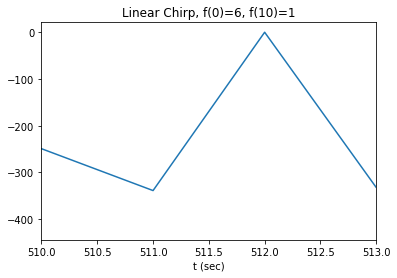

In [3]:
#binaryの開き方
# a = np.fromfile("sweep.fb", np.float32)  

pulse = np.convolve(up_ss_signal, down_ss_signal, mode='full') 
dB = 10*np.log10(pulse**2)
dB = dB - max(dB)

plt.plot(dB)
plt.title("Linear Chirp, f(0)=6, f(10)=1") 
plt.xlabel('t (sec)') 
# plt.xlim([N-50,135000])
plt.xlim([N-2,N+1])
# plt.ylim([-50,0])
plt.show()

In [4]:
# # log sweep (使わない)

# N = 2**17
# J = N/2
# k = np.arange(1,N/2+1,1)#1スタートに注意

# up_ss = np.zeros(N+1, dtype = np.complex)
# up_ss[0]=1
# up_ss[1:int(N/2+1)] = 1/np.sqrt(k) * np.exp(-1j*np.pi*J * k*np.log(k)/((N/2)*np.log(N/2)))
# up_ss_firsthalf = up_ss[:int(N/2)]
# up_ss[int(N/2+1):] = up_ss_firsthalf[::-1].conjugate()

# # 逆FFT
# up_ss_ifft = ifft(up_ss, n=N)
 
# # 実部取り出し
# up_ss_ifft_real = np.real(up_ss_ifft)
 
# # 円状シフト
# shift_length = int((N-J)/2)
# up_ss_ifft_real_roll = np.roll(up_ss_ifft_real, shift_length)
 
# # 信号の可視化，再生
# up_ss_signal = up_ss_ifft_real_roll * 100
 
# plt.plot(up_ss_signal)
# plt.xlabel("Sample")
# plt.ylabel("Amplitude")
# plt.show()

# sf.write('./data/logsweep.wav',up_ss_signal,fs)

In [5]:
a = [0,1,2,3,4,5,6]
a[:6]
# k = np.arange(0,N/2+1,1)
# k[:int(N/2+1)]

[0, 1, 2, 3, 4, 5]

In [6]:
2**17/2

65536.0